In [6]:
import aim_modules as am
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
import pandas as pd

In [7]:
runs = ["run01","run02","run03","run04","run05"]
ti_home = "/Users/ChrisM/Documents/workspace/TI/"
times = ["100ps", "250ps", "500ps","1ns","5ns","10ns"]
names = ["N","CoulL","VdwL","Count","G","dG","AIMCount","dGCoulL","dGVdwL"]
ti_names = ["dGCoulL","dGVdwL"]
coulLambdas = [0.0,0.2,0.4,0.6,0.8,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.00,1.0,1.00,1.0,1.00,1.0,1.00,1.0]
vdwLambdas  = [0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.3,0.4,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]

In [8]:
TI_dGCoulL = DataFrame(columns=range(21),index=range(25))
AIM_dGCoulL = DataFrame(columns=range(21),index=range(25))
TI_dGVdwL = DataFrame(columns=range(21),index=range(25))
AIM_dGVdwL = DataFrame(columns=range(21),index=range(25))

all_lambdas = {}
all_lambdas['TI_dGCoulL'] = {}
all_lambdas['TI_dGVdwL'] = {}
all_lambdas['AIM_dGCoulL'] = {}
all_lambdas['AIM_dGVdwL'] = {}

for j in times:
    all_lambdas['AIM_dGCoulL'][j]= DataFrame(columns=range(21),index=range(5))
    all_lambdas['AIM_dGVdwL'][j]= DataFrame(columns=range(21),index=range(5))
    all_lambdas['TI_dGCoulL'][j]= DataFrame(columns=range(21),index=range(5))
    all_lambdas['TI_dGVdwL'][j]= DataFrame(columns=range(21),index=range(5))
    for i in range(len(runs)):
        aim_location = "/Users/ChrisM/Documents/workspace/AIM/{0}/{0}{1}.out".format(j, runs[i])
        ti_location  = "/Users/ChrisM/Documents/workspace/TI/{0}/{1}.out".format(j, runs[i])
        AIM = pd.read_csv(
            aim_location, 
            header = None,
            names = names,
            delim_whitespace=True)

        all_lambdas['AIM_dGCoulL'][j].iloc[i]= AIM.dGCoulL
        all_lambdas['AIM_dGVdwL'][j].iloc[i]= AIM.dGVdwL

        TI = pd.read_csv(
            ti_location, 
            header = None,
            names = ti_names,
            delim_whitespace=True)

        all_lambdas['TI_dGCoulL'][j].iloc[i]= TI.dGCoulL
        all_lambdas['TI_dGVdwL'][j].iloc[i]= TI.dGVdwL

In [9]:
np.std(all_lambdas['TI_dGCoulL']['1ns'][0])

0.19229487148647578

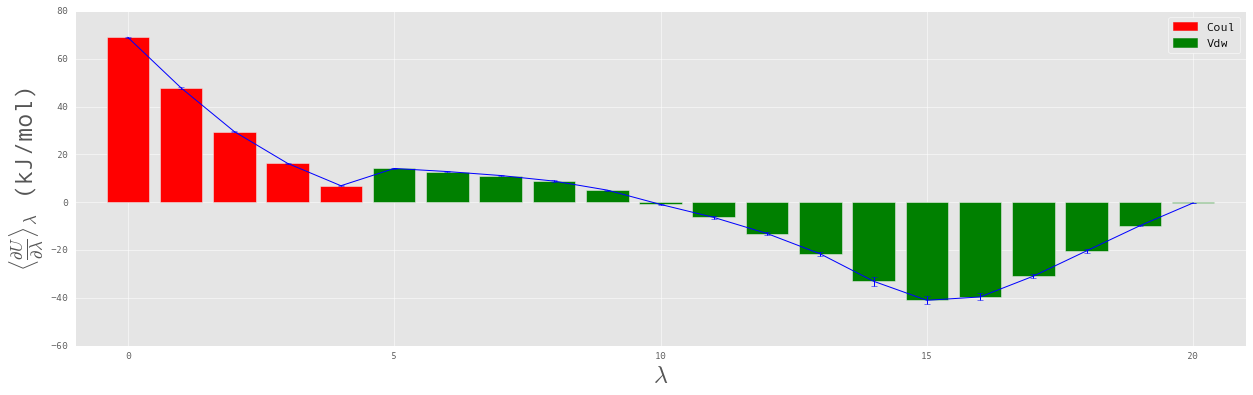

In [10]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# want coul components where coulLambdas not equal to 1.0
# want vdw components where vdwLambdas not equal to 0.0
plt.figure(figsize=(len(coulLambdas), 6))
y2 = np.zeros(21)
ti_results = []
for i in range(len(coulLambdas)):
    
    if coulLambdas[i] != 1.0:
        avg = all_lambdas['TI_dGCoulL']['1ns'][i].mean()
        y2[i] = (all_lambdas['TI_dGCoulL']['1ns'][i].mean())
        
        err = np.std(all_lambdas['TI_dGCoulL']['1ns'][i])
        ti_results.append(err)
        plt.bar(i, avg, color='r',align='center')

    else:
        avg = all_lambdas['TI_dGVdwL']['1ns'][i].mean()
        y2[i] = (all_lambdas['TI_dGVdwL']['1ns'][i].mean())
        err = np.std(all_lambdas['TI_dGVdwL']['1ns'][i])
        ti_results.append(err)
        plt.bar(i, avg, color='g', align='center')
        
x = range(0,21)        
#plt.plot(x, y2, color='g', label="Fixed $\lambda$")
plt.errorbar(x, y2, color='b', yerr=ti_results, label="Fixed $\lambda$", fmt='-')
plt.xlim(-1,21)
plt.ylabel(r'$\langle\frac{\partial U}{\partial \lambda}\rangle_{\lambda}$ (kJ/mol)', fontsize = 24)
plt.xlabel(r'$\lambda$', fontsize = 24)
red_patch = mpatches.Patch(color='red', label='Coul')
green_patch = mpatches.Patch(color='green', label='Vdw')


plt.legend(handles=[red_patch, green_patch])

In [ ]:
all_lam

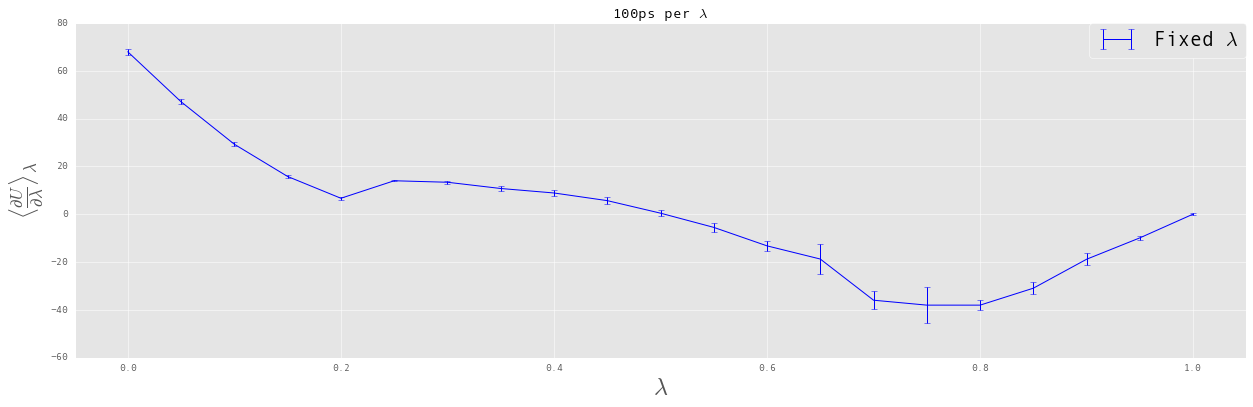

ValueError: err must be a scalar, the same dimensions as x, or 2xN.

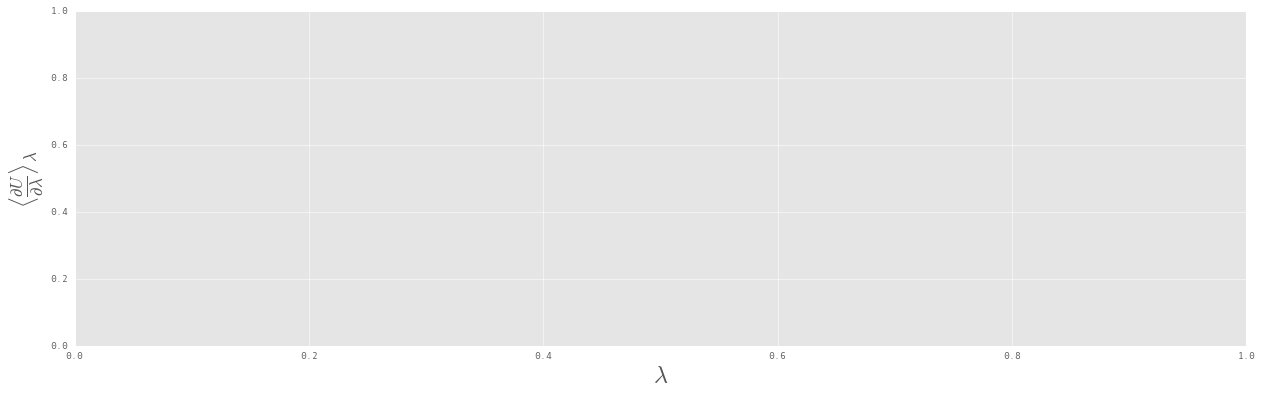

In [11]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
# plot the electrostatic energies
ti_results = []

aim_results = []
for j in times:
    plt.close()
    y1 = np.zeros(21)
    y2 = np.zeros(21)
    for i in range(21):
        if coulLambdas[i] != 1.0:
            aim_results.append(np.std(all_lambdas['AIM_dGCoulL'][j][i]))
            ti_results.append(np.std(all_lambdas['TI_dGCoulL'][j][i]))
            y1[i] = (all_lambdas['AIM_dGCoulL'][j][i].mean())
            y2[i] = (all_lambdas['TI_dGCoulL'][j][i].mean())
        else:
            aim_results.append(np.std(all_lambdas['AIM_dGVdwL'][j][i]))
            ti_results.append(np.std(all_lambdas['TI_dGVdwL'][j][i]))
            y1[i] = (all_lambdas['AIM_dGVdwL'][j][i].mean())
            y2[i] = (all_lambdas['TI_dGVdwL'][j][i].mean())
    
    # plot with various axes scales
    plt.figure(figsize=(len(coulLambdas), 6))
    
    x = np.linspace(0,1,21)
    plt.ylabel(r'$\langle\frac{\partial U}{\partial \lambda}\rangle$$_{\lambda}$', fontsize = 24)
    plt.xlabel(r'$\lambda$', fontsize = 24)
    
    #plt.errorbar(x, y1, color='g', yerr=aim_results, label="AIM ExE", fmt='-')
    # plot fixed lambda sims
    plt.errorbar(x, y2, color='b', yerr=ti_results, label="Fixed $\lambda$", fmt='-')
    
    plt.title(j + " per $\lambda$")
    plt.legend(loc=0, borderaxespad=0., fontsize=20, ncol=1)
    plt.style.use('ggplot')
    plt.xlim(-0.05, 1.05)

    plt.show()

100ps


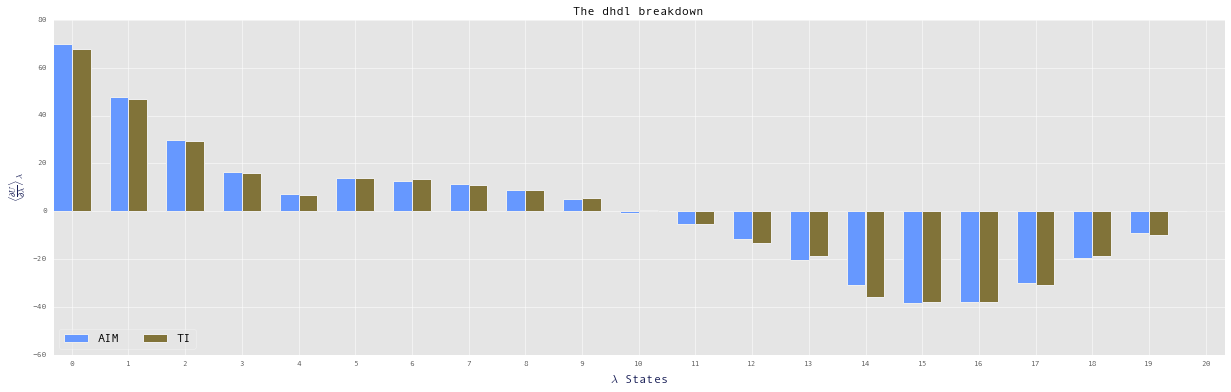

250ps


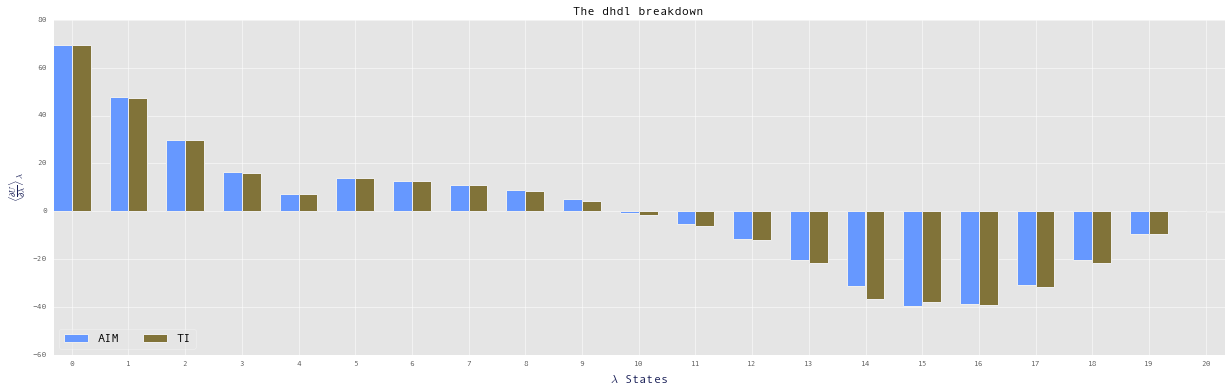

500ps


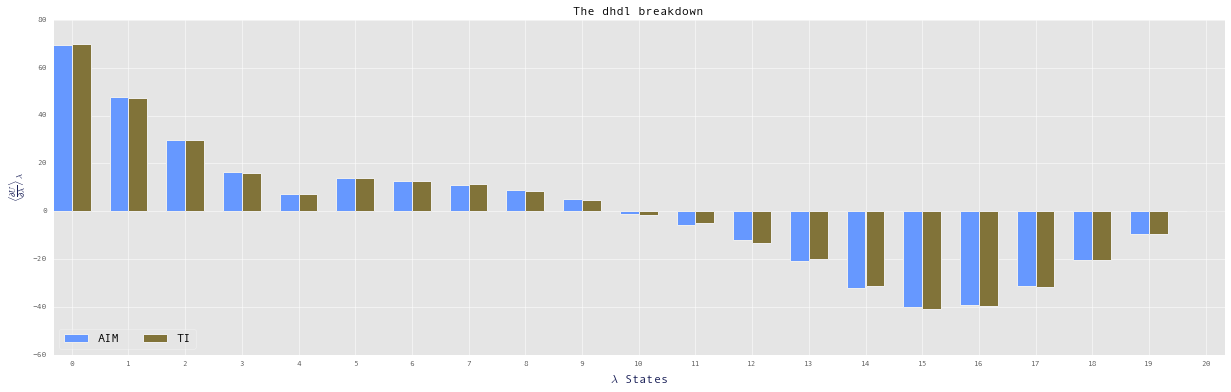

1ns


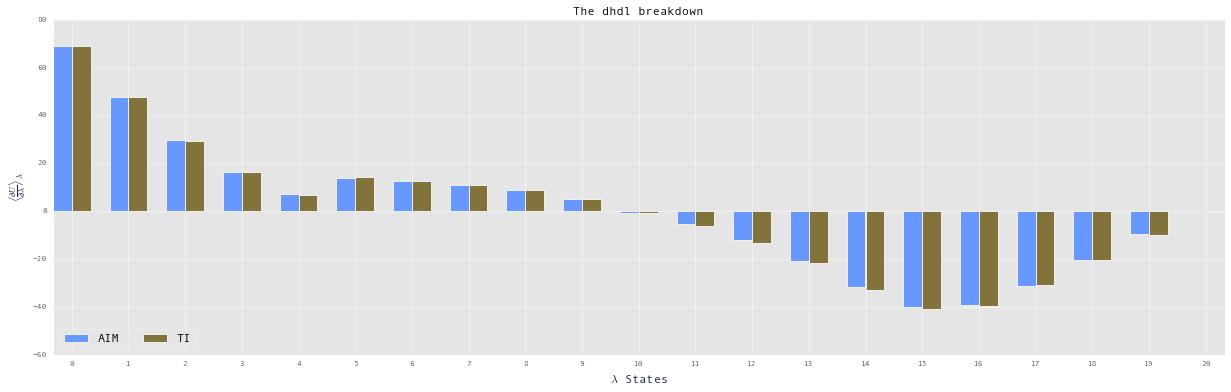

5ns


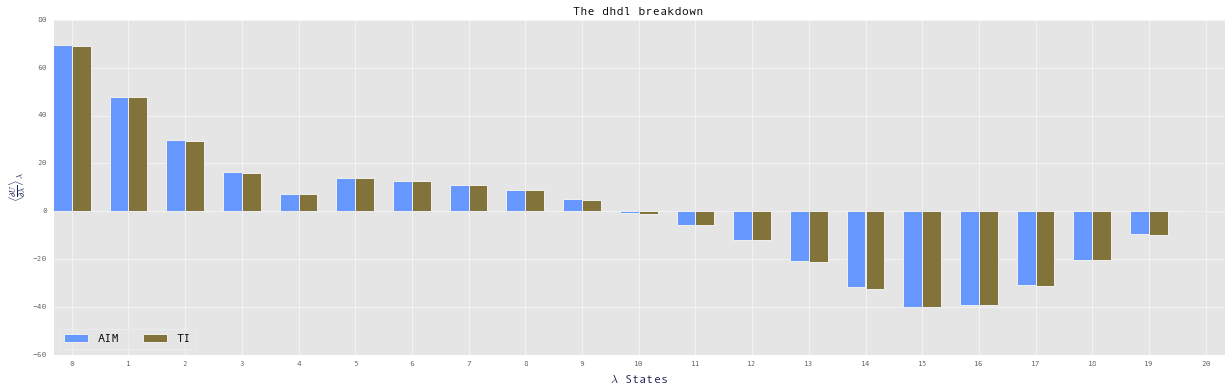

10ns


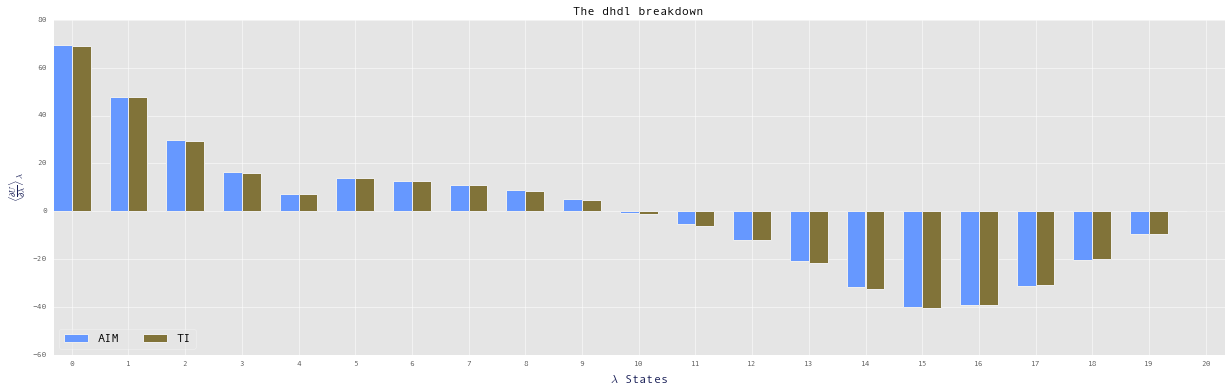

In [19]:
for j in times:
    plt.close()
    y1 = np.zeros(21)
    y2 = np.zeros(21)
    for i in range(21):
        if coulLambdas[i] != 1.0:
            aim_results.append(np.std(all_lambdas['AIM_dGCoulL'][j][i]))
            ti_results.append(np.std(all_lambdas['TI_dGCoulL'][j][i]))
            y1[i] = (all_lambdas['AIM_dGCoulL'][j][i].mean())
            y2[i] = (all_lambdas['TI_dGCoulL'][j][i].mean())
        else:
            aim_results.append(np.std(all_lambdas['AIM_dGVdwL'][j][i]))
            ti_results.append(np.std(all_lambdas['TI_dGVdwL'][j][i]))
            y1[i] = (all_lambdas['AIM_dGVdwL'][j][i].mean())
            y2[i] = (all_lambdas['TI_dGVdwL'][j][i].mean())
    
    df_allk = {}
    df_allk['AIM'] = y1
    df_allk['TI'] = y2

    print(j)
    am.plotdFvsLambda2(df_allk, times=['AIM','TI'], ymin=-60, ymax=80, num_lambdas=len(coulLambdas))